In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
# Charger le jeu de données train.csv
train_data = pd.read_csv('data/train.csv')

# Charger le fichier covtype.info pour connaître la description des variables
with open('data/covtype.info', 'r') as file:
    covtype_info = file.read()
    
# Afficher un aperçu des données et des informations
print(covtype_info)
train_data.head()

The Forest CoverType dataset


1.	Title of Database:

	Forest Covertype data


2.	Sources:

	(a) Original owners of database:
		Remote Sensing and GIS Program
		Department of Forest Sciences
		College of Natural Resources
		Colorado State University
		Fort Collins, CO  80523
		(contact Jock A. Blackard, jblackard 'at' fs.fed.us
		      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)

	NOTE:	Reuse of this database is unlimited with retention of 
		copyright notice for Jock A. Blackard and Colorado 
		State University.

	(b) Donors of database:
		Jock A. Blackard (jblackard 'at' fs.fed.us)
		GIS Coordinator
		USFS - Forest Inventory & Analysis
		Rocky Mountain Research Station
		507 25th Street
		Ogden, UT 84401

		Dr. Denis J. Dean (denis.dean 'at' utdallas.edu)
		Professor
		Program in Geography and Geospatial Sciences
		School of Economic, Political and Policy Sciences
		800 West Campbell Rd
		Richardson, TX  75080-3021 
		
		Dr. Charles W. Anderson (anderson 'at' cs.colostate.edu

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# Dimensions du jeu de données
print("Dimensions des données : ", train_data.shape)

# Types de variables et valeurs manquantes
print(train_data.info())

# Résumé statistique des données numériques
print(train_data.describe())


Dimensions des données :  (50120, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50120 entries, 0 to 50119
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           50120 non-null  int64
 1   Aspect                              50120 non-null  int64
 2   Slope                               50120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    50120 non-null  int64
 4   Vertical_Distance_To_Hydrology      50120 non-null  int64
 5   Horizontal_Distance_To_Roadways     50120 non-null  int64
 6   Hillshade_9am                       50120 non-null  int64
 7   Hillshade_Noon                      50120 non-null  int64
 8   Hillshade_3pm                       50120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  50120 non-null  int64
 10  Wilderness_Area1                    50120 non-null  int64
 11  Wilderness_Area2             


Valeurs uniques de la variable cible :  [5 2 1 7 3 6 4]


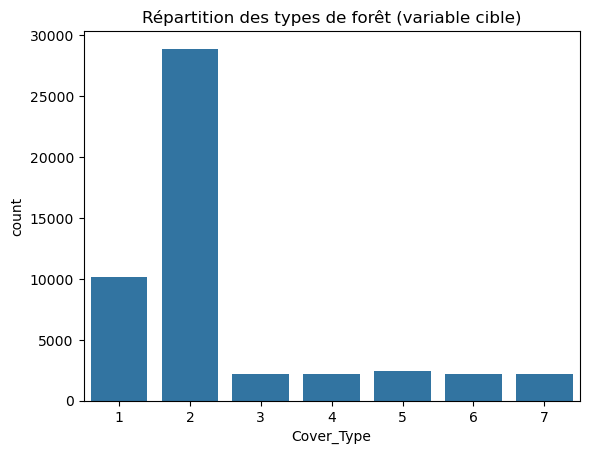

In [5]:
# Vérifier les valeurs uniques de la variable cible (y)
target_column = 'Cover_Type'  # Assurez-vous que cette colonne est correcte
print("\nValeurs uniques de la variable cible : ", train_data[target_column].unique())

# Distribution des classes dans la variable cible
sns.countplot(x=target_column, data=train_data)
plt.title('Répartition des types de forêt (variable cible)')
plt.show()


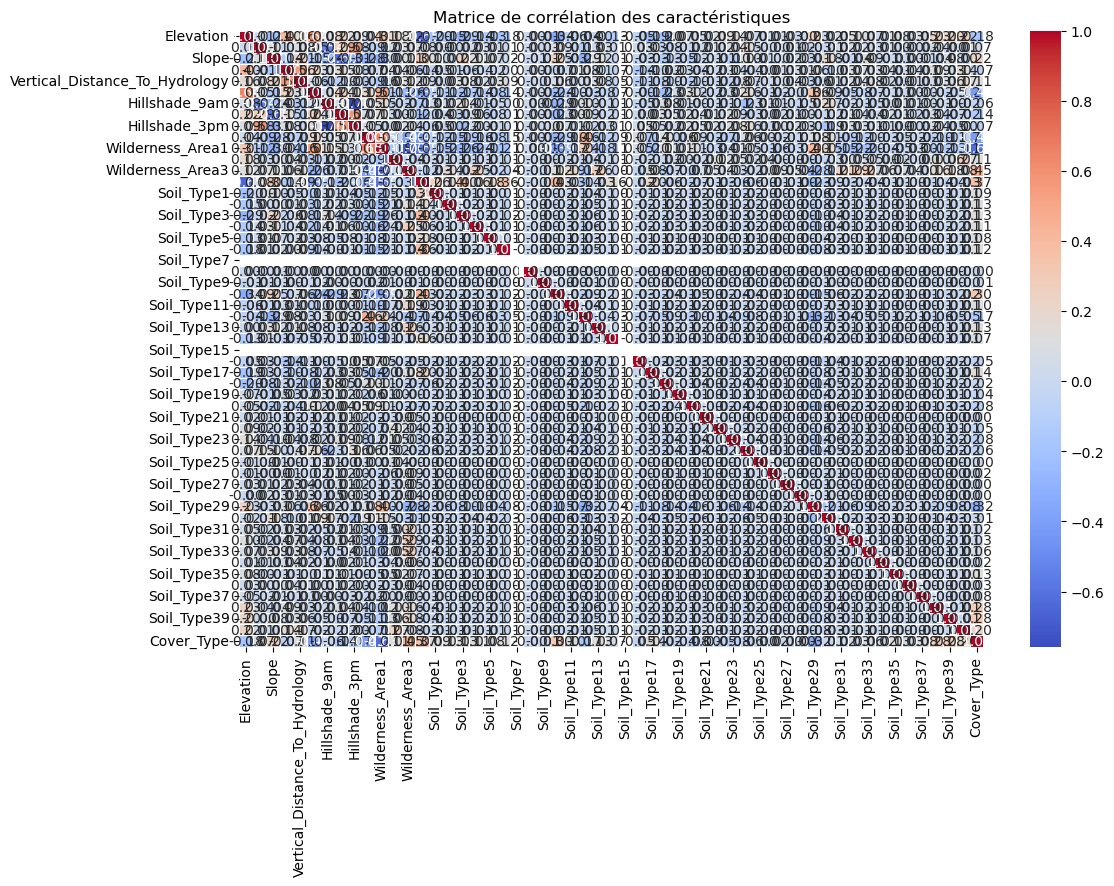

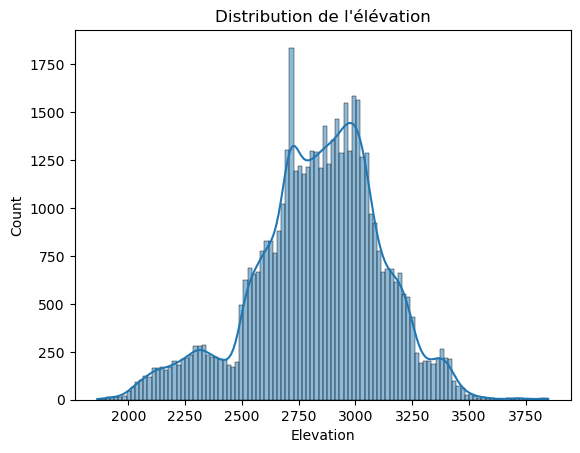

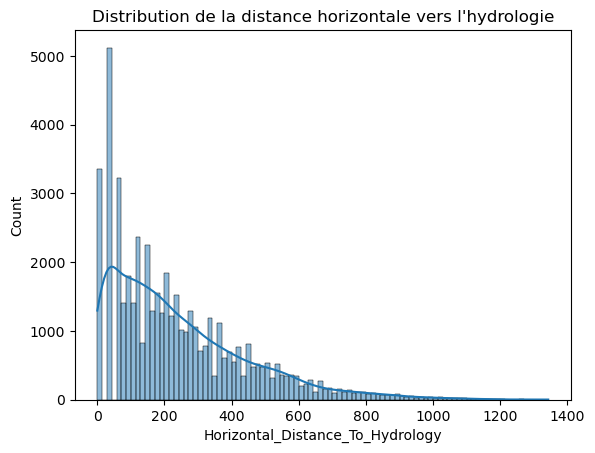

In [6]:
# Tracer une matrice de corrélation entre les caractéristiques numériques
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de corrélation des caractéristiques')
plt.show()

# Tracer les distributions de certaines caractéristiques
sns.histplot(train_data['Elevation'], kde=True)
plt.title('Distribution de l\'élévation')
plt.show()

sns.histplot(train_data['Horizontal_Distance_To_Hydrology'], kde=True)
plt.title('Distribution de la distance horizontale vers l\'hydrologie')
plt.show()


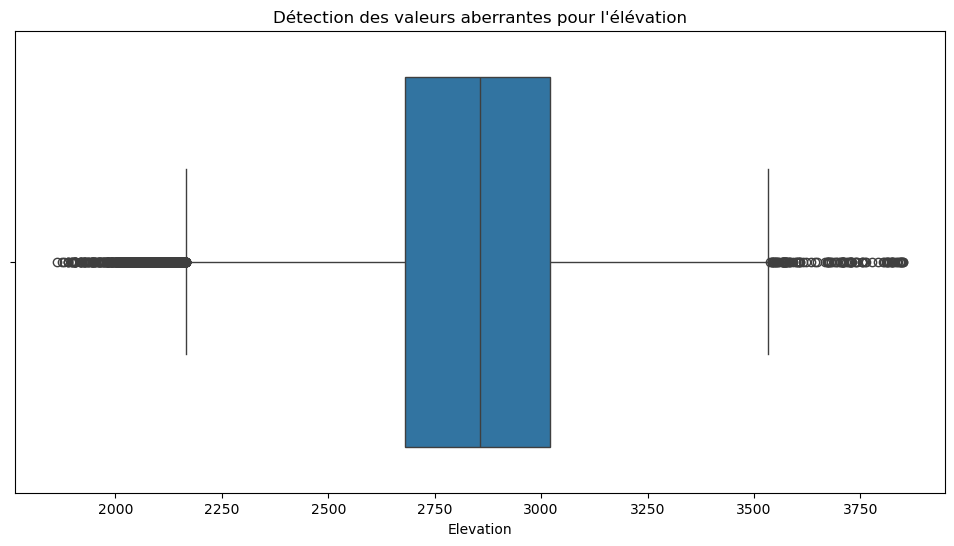

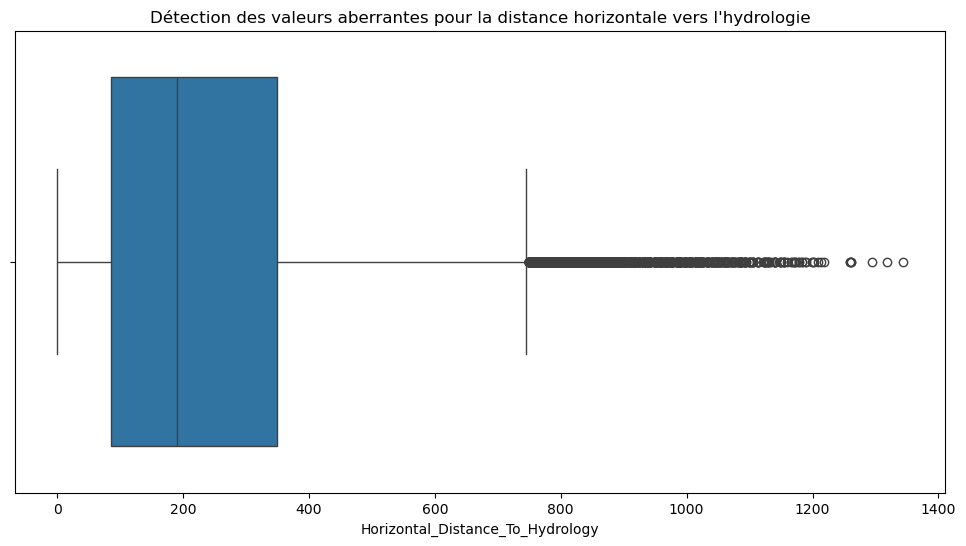

In [7]:
# Utilisation de boxplots pour détecter les valeurs aberrantes
plt.figure(figsize=(12, 6))
sns.boxplot(x=train_data['Elevation'])
plt.title('Détection des valeurs aberrantes pour l\'élévation')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=train_data['Horizontal_Distance_To_Hydrology'])
plt.title('Détection des valeurs aberrantes pour la distance horizontale vers l\'hydrologie')
plt.show()


In [8]:
# Créer une nouvelle caractéristique : distance totale à l'hydrologie
train_data['Distance_To_Hydrology'] = np.sqrt(train_data['Horizontal_Distance_To_Hydrology']**2 + train_data['Vertical_Distance_To_Hydrology']**2)

# Afficher un aperçu des nouvelles caractéristiques
train_data[['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Distance_To_Hydrology']].head()


,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Distance_To_Hydrology
0,258,0,258.000000
1,212,-6,212.084889
2,268,65,275.769832
3,242,118,269.235956
4,153,-1,153.003268


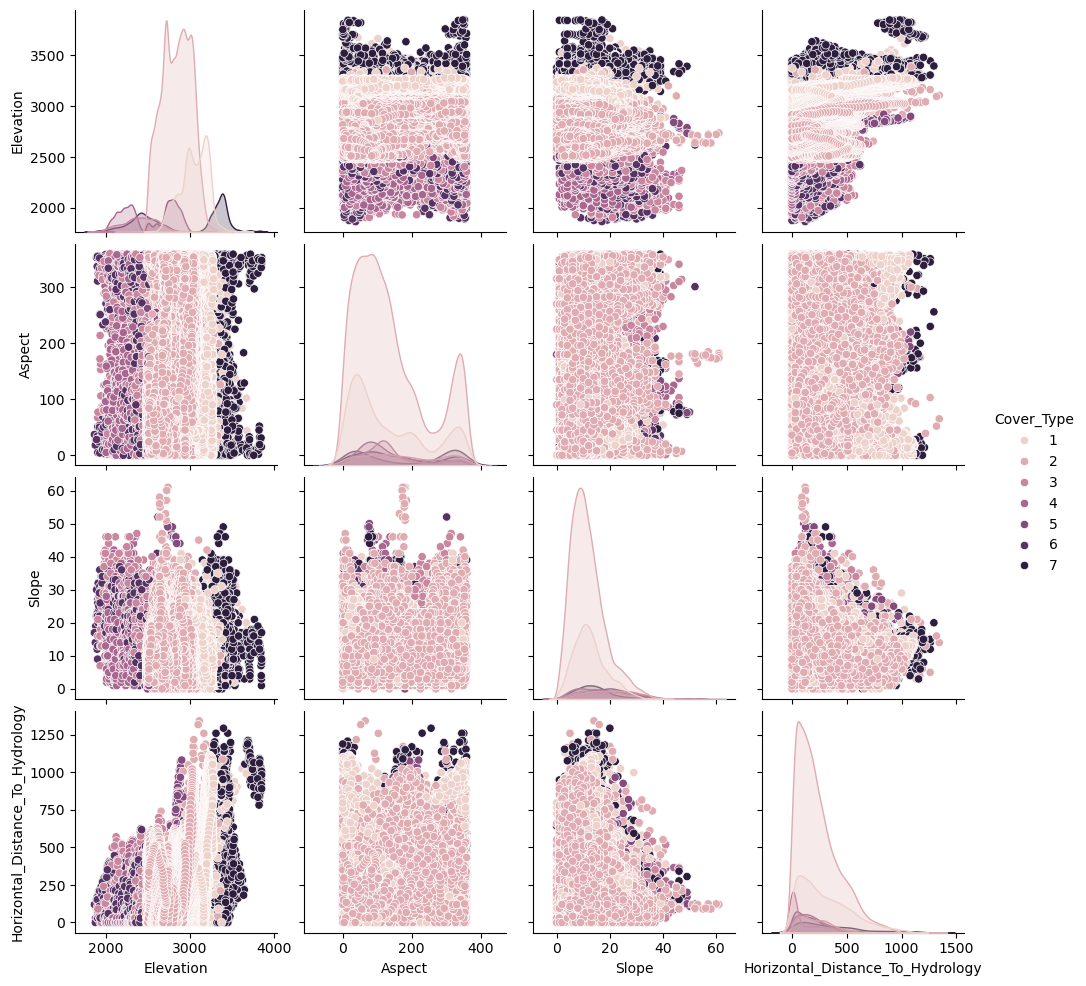

In [9]:
# Utilisation d'un pairplot pour observer les relations entre certaines caractéristiques
sns.pairplot(train_data[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Cover_Type']], hue='Cover_Type')
plt.show()


In [10]:
# Sauvegarder les nouvelles caractéristiques dans un nouveau fichier CSV
train_data.to_csv('data/train_with_features.csv', index=False)


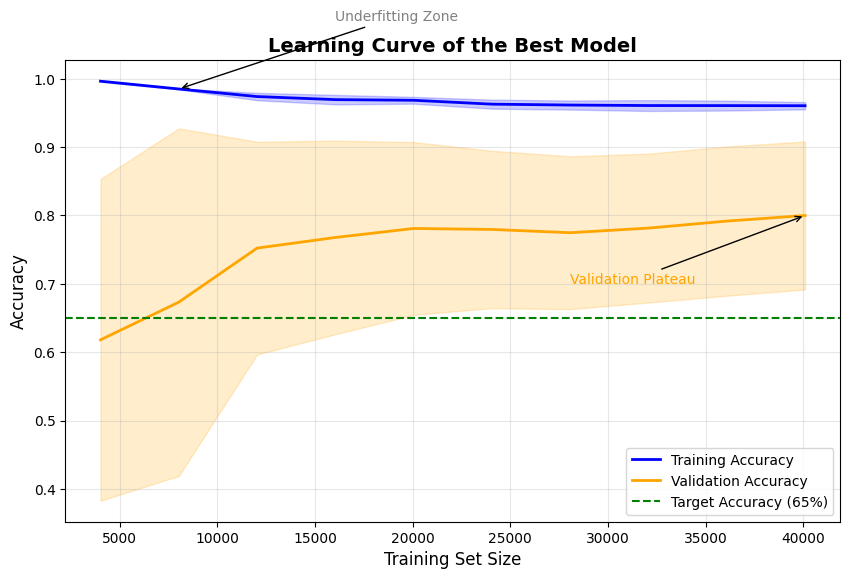

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier  # Exemple avec RandomForest

# Charger les données
import pandas as pd
data = pd.read_csv("data/train.csv")
X = data.drop(columns=["Cover_Type"])  # Remplacer "Cover_Type" par la colonne cible
y = data["Cover_Type"]

# Meilleur modèle trouvé (par exemple RandomForest)
best_model = RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42)

# Calcul des courbes d'apprentissage
train_sizes, train_scores, valid_scores = learning_curve(
    best_model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Moyenne et écart type des scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

# Tracé de la courbe
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue", linewidth=2)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
plt.plot(train_sizes, valid_mean, label="Validation Accuracy", color="orange", linewidth=2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color="orange")

# Ajout de la ligne guide pour une précision cible (par exemple, 65%)
plt.axhline(y=0.65, color="green", linestyle="--", linewidth=1.5, label="Target Accuracy (65%)")

# Configuration du graphique
plt.title("Learning Curve of the Best Model", fontsize=14, fontweight="bold")
plt.xlabel("Training Set Size", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)

# Annotations pour plus de clarté
plt.annotate(
    "Underfitting Zone",
    xy=(train_sizes[1], train_mean[1]),
    xytext=(train_sizes[3], train_mean[1] + 0.1),
    arrowprops=dict(facecolor='gray', arrowstyle="->"),
    fontsize=10,
    color="gray"
)
plt.annotate(
    "Validation Plateau",
    xy=(train_sizes[-1], valid_mean[-1]),
    xytext=(train_sizes[-4], valid_mean[-1] - 0.1),
    arrowprops=dict(facecolor='orange', arrowstyle="->"),
    fontsize=10,
    color="orange"
)

# Sauvegarde du graphique
plt.savefig("results/learning_curve_best_model.png", dpi=300, bbox_inches="tight")
plt.show()


In [12]:
## Conclusion de l'EDA

#Les variables sont assez diversifiées et présentent des relations intéressantes entre elles.
#Nous avons créé de nouvelles caractéristiques qui pourraient améliorer les performances du modèle.
#L'étape suivante consiste à préparer les données pour l'entraînement du modèle et à sélectionner les caractéristiques les plus pertinentes.

